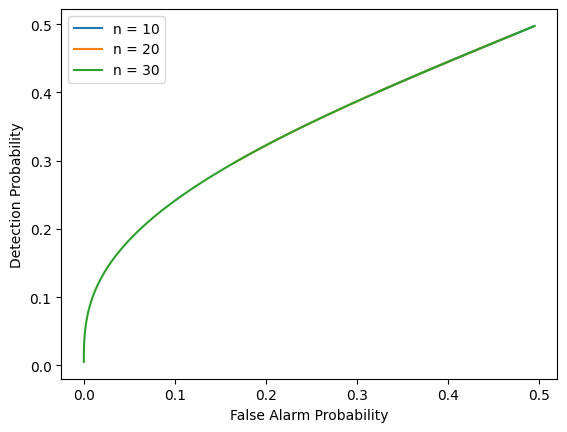

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def log_likelihood_ratio(y, n, ratio):
    sigma_w = ratio / (1 - ratio)
    sigma_p = np.sqrt(sigma_w + ratio)
    eta = y
    pf = 1 - norm.cdf(eta / sigma_w)
    pd = 1 - norm.cdf(eta / sigma_p)
    return pf, pd

def plot_roc(n, ratio):
    s1 = ratio / (1 - ratio)
    s2 = np.sqrt((ratio / (1 - ratio)) + ratio)
    up = np.random.normal(loc = 0, scale = s1, size = n)
    down = np.random.normal(loc = 0, scale = s2, size = n)
    y = norm.pdf(up, loc = 0, scale = s1)/norm.pdf(down, loc = 0, scale = s2)
    thresholds = np.linspace(np.min(y), np.max(y), 100)
    PD = np.zeros(100)
    PF = np.zeros(100)
    for i in range(100):
        PF[i], PD[i] = log_likelihood_ratio(thresholds[i], n, ratio)
    plt.plot(PF, PD, label=f"n = {n}")
n_values = [10, 20, 30]
ratio = 0.8

for n in n_values:
    plot_roc(n, ratio)

plt.xlabel("False Alarm Probability")
plt.ylabel("Detection Probability")
plt.legend()
plt.show()

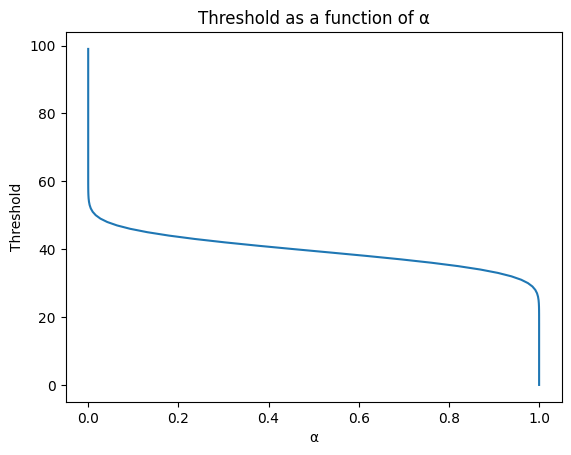

In [7]:
#Q7(b)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import comb
p0 = 0.4
n = 100
z = np.arange(0, 100, 1)
a = []
sumup = 0
for i, zeta in enumerate(z):
    sumup += comb(n, zeta) * (p0**zeta) * ((1 - p0)**(n - zeta))
    a.append(1 - sumup)
plt.plot(a, z)
plt.xlabel('α')
plt.ylabel('Threshold')
plt.title('Threshold as a function of α')
plt.show()